In [2]:
#imports we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

SummaryYear: 0.00%
SummaryMonth: 0.00%
SettlementAmountISK: 0.32%
NMerchantID: 0.00%
MerchantName: 0.00%
CompanySSN: 0.00%
Transactions: 0.00%
Fees: 17.42%
FeeRatio: 17.99%
TransactionsLastTwoMonths: 2.76%
SettlementsLastTwoMonths: 2.77%
FeeRatioLastTwoMonths: 11.96%
MerchantBalance: 0.89%
MerchantActive: 0.00%


<AxesSubplot:>

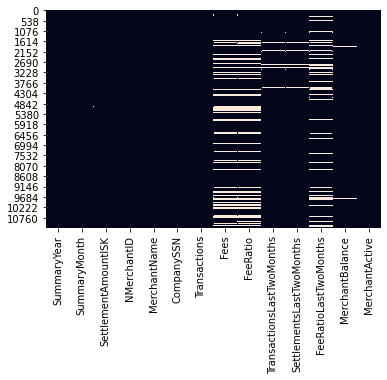

In [7]:
icelandic_merchants = pd.read_csv("../Data/Icelandic_Set.csv", sep=';', decimal=',')

row_count, col_count = icelandic_merchants.shape
incomplete_features = []
for index, missingAmount in enumerate(icelandic_merchants.isnull().sum()):
    percentage = (missingAmount / row_count)*100
    feature = icelandic_merchants.columns[index]
    if percentage > 30:
        incomplete_features.append(feature)
    print(f"{feature}: {percentage:.2f}%")   

sb.heatmap(icelandic_merchants.isnull(), cbar=False)

In [8]:
predicted = pd.read_csv("../Data/predicted.csv")
called_merchants = pd.read_csv("../Data/bankrupt_set.csv")
raw_set = pd.read_csv("../Data/RawStdevSSNs.csv")

predicted.head()

,SummaryYear,SummaryMonth,SettlementAmountISK,NMerchantID,MerchantName,CompanySSN,Transactions,Fees,FeeRatio,TransactionsLastTwoMonths,SettlementsLastTwoMonths,FeeRatioLastTwoMonths,MerchantBalance,MerchantActive,predicted label
0,2020,11,500423.0,8001900,Bilar og Hjol,6201033570,11,-1670.9023,-0.003339,70.0,3286017.0,-0.006615,65109.0,1,active
1,2020,10,4444593.0,8001943,Dýralæknastofa Suðurnesja,5411032870,359,-38851.4368,-0.008741,309.0,3947269.0,-0.002695,269759.0,1,active
2,2020,11,697709.0,8002020,Von verslun ehf.,4412170130,48,-7512.0642,-0.010767,289.0,3913514.0,-0.006520,-290.0,1,active
3,2020,11,300.0,8002045,Elite Thjalfun,5506200140,1,-360.5600,-1.201867,120.0,67725.5,-0.012441,-290.0,1,active
4,2020,11,606110.0,8002135,Verslunin Still,5508003060,25,-6463.9580,-0.010665,57.0,1432180.5,-0.007012,-290.0,1,active


In [10]:
number = 0
predicted_set = set(predicted[predicted['predicted label']=='churned']['CompanySSN'])
called_merchants = set(called_merchants['CompanySSN'])

print(len(predicted_set.intersection(called_merchants)))

8


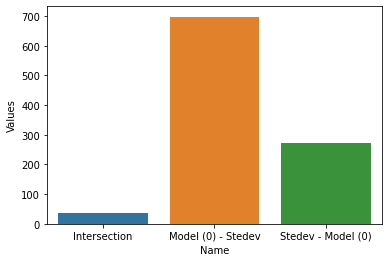

In [21]:
raw_merchants = set(raw_set['CompanySSN'])

data_raw = pd.DataFrame({
    "Name": ["Intersection", "Model (0) - Stedev", "Stedev - Model (0)"],
    "Values": [len(set(predicted[predicted['predicted label']=='churned']['CompanySSN']).intersection(raw_merchants)),
               len(set(predicted[predicted['predicted label']=='churned']['CompanySSN']).difference(raw_merchants)),
               len(raw_merchants.difference(set(predicted[predicted['predicted label']=='churned']['CompanySSN'])))]
    })
ax = sb.barplot(x="Name", y="Values", data=data_raw)